In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=df= pd.read_excel('data_dash.xlsx')

In [3]:
df.head(5)

,Country,Product,Units Sold,Revenue,Cost,Profit,Date
0,India,Chocolate Chip,1725.0,8625.0,3450.0,5175.0,2019-11-01
1,India,Chocolate Chip,2152.0,10760.0,4304.0,6456.0,2019-12-01
2,India,Chocolate Chip,2349.0,11745.0,4698.0,7047.0,2019-09-01
3,India,Chocolate Chip,1228.0,6140.0,2456.0,3684.0,2019-10-01
4,India,Chocolate Chip,1389.0,6945.0,2778.0,4167.0,2019-10-01


In [4]:
df.describe()

,Units Sold,Revenue,Cost,Profit
count,1225.000000,1225.000000,1225.000000,1225.000000
mean,1622.019592,6757.133878,2775.848367,3981.285510
std,873.003844,4660.467982,2052.363875,2637.221232
min,200.000000,200.000000,40.000000,160.000000
25%,914.000000,2895.000000,1180.000000,1857.500000
50%,1540.000000,5885.000000,2431.250000,3429.000000
75%,2276.000000,9576.000000,3968.000000,5469.000000
max,4493.000000,23988.000000,10994.500000,13479.000000


In [5]:
df.isnull().sum()

Country       0
Product       0
Units Sold    0
Revenue       0
Cost          0
Profit        0
Date          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Country     1225 non-null   object        
 1   Product     1225 non-null   object        
 2   Units Sold  1225 non-null   float64       
 3   Revenue     1225 non-null   float64       
 4   Cost        1225 non-null   float64       
 5   Profit      1225 non-null   float64       
 6   Date        1225 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 67.1+ KB


In [7]:
print(df.shape)

(1225, 7)


# Revenue By Country

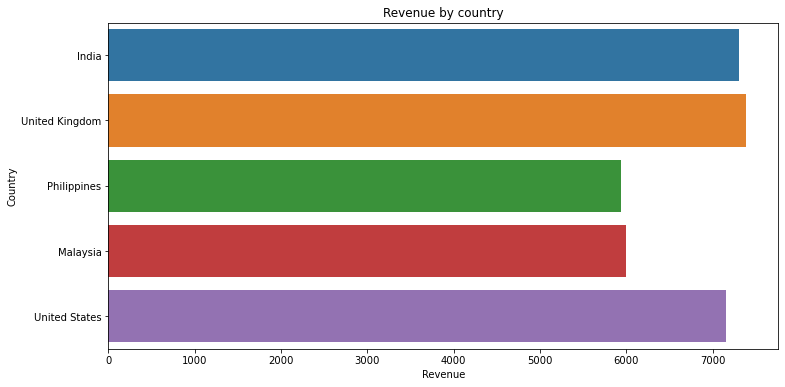

In [9]:
plt.figure(figsize = (12,6))
plt.title('Revenue by country')
sns.barplot(x ='Revenue', y='Country', data=df ,ci=None)
plt.show()

In [10]:
df['Date'].min()

Timestamp('2019-09-01 00:00:00')

In [11]:
df['Date'].max()

Timestamp('2020-12-01 00:00:00')

In [12]:
#getting month year from dataset
df['month_year'] = df ['Date'].apply(lambda x: x.strftime('%y-%m'))

In [13]:
df.groupby('month_year').sum()

,Units Sold,Revenue,Cost,Profit
month_year,,,,
19-09,50601.0,212076.0,87263.45,124812.55
19-10,95622.0,386395.0,158119.40,228275.60
19-11,65481.0,272112.0,111883.75,160228.25
19-12,52970.0,232566.0,96228.25,136337.75
20-01,135682.0,583706.0,241070.80,342635.20
20-02,110230.0,463850.0,191913.50,271936.50
20-03,106840.0,438142.0,179175.90,258966.10
20-04,157786.0,666760.0,273228.10,393531.90
20-05,103542.0,431732.0,178018.30,253713.70


In [14]:
df_trend = df.groupby('month_year').sum() ['Profit'].reset_index()

# Sales Trend

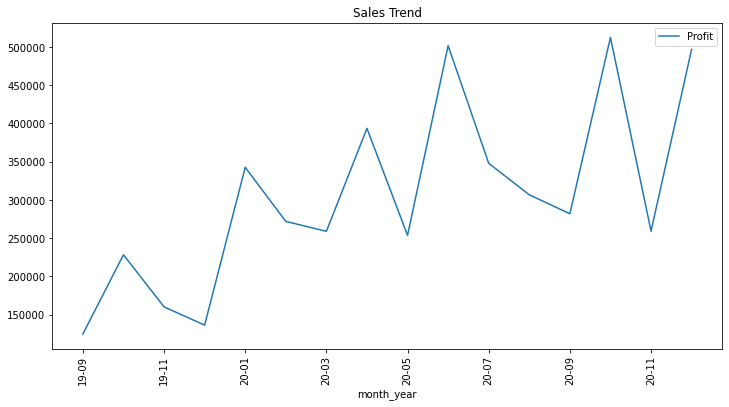

In [15]:
#plt.figure(figsize=(15,6))
df_trend.plot(x='month_year', y='Profit' ,figsize = [12,6])
plt.xticks(rotation='vertical', size=10)
plt.title('Sales Trend')
plt.show()

 Countries with the lowest cost had the lowest sales == Malaysia and Philippines had the lowest cost sale

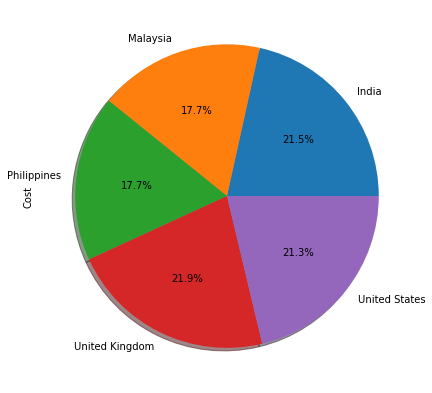

In [16]:
plt.figure(figsize = (6.8,7.3))
df.groupby('Country')['Cost'].sum().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.show()

Units of goods Purchased

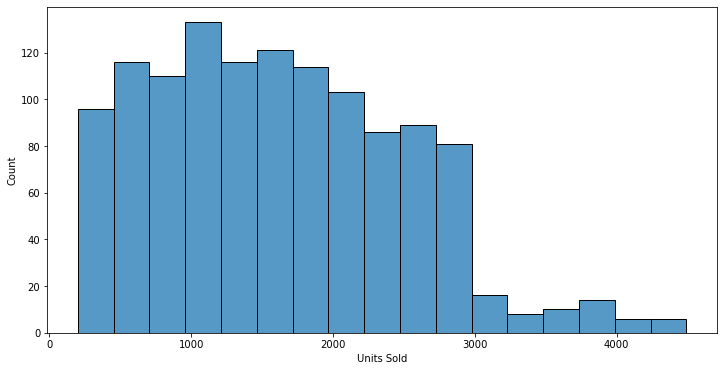

In [20]:
#Number of Units of goods Purchased
plt.figure(figsize=(12,6))
sns.histplot(df['Units Sold'], kde=False)
plt.show()

The Most Purchased Item Was Chocolate Chip

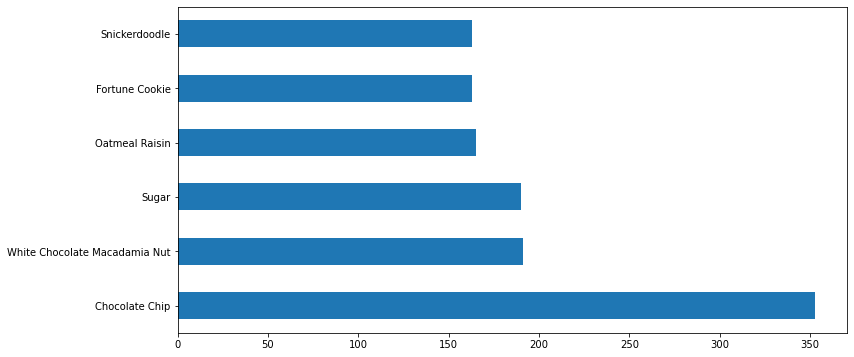

In [18]:
#The Most Purchased Item Was Chocolate Chip
df['Product'].value_counts().plot(kind='barh', figsize = [12,6])
plt.show()

In [21]:
df_profit= df[['Units Sold','Profit']]

Indians were the highest consumers of chocolate chip *

In [23]:
#Indians where the highest consumers of chocolate chip *
df.groupby('Country')['Product'].value_counts()

Country         Product                      
India           Chocolate Chip                   73
                Sugar                            38
                Snickerdoodle                    35
                White Chocolate Macadamia Nut    35
                Fortune Cookie                   32
                Oatmeal Raisin                   32
Malaysia        Chocolate Chip                   70
                White Chocolate Macadamia Nut    39
                Fortune Cookie                   35
                Oatmeal Raisin                   35
                Sugar                            35
                Snickerdoodle                    31
Philippines     Chocolate Chip                   70
                Sugar                            39
                White Chocolate Macadamia Nut    39
                Snickerdoodle                    35
                Fortune Cookie                   31
                Oatmeal Raisin                   31
United Kingdom  Ch

# Profit by the number of units Sold

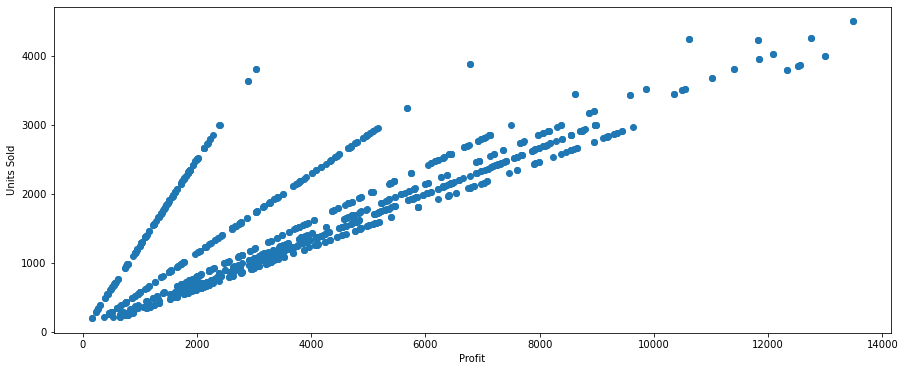

In [22]:
## Profit by the number of units Sold
plt.figure(figsize=(15,6))
plt.scatter(df['Profit'], df['Units Sold'])
plt.ylabel('Units Sold')
plt.xlabel('Profit')
plt.show()